In [1]:
#
# Question 5: Plot Tesla Stock Graph
#

In [2]:
# Use the make_graph function to graph the Tesla Stock Data, also provide a title for the graph. 
# Note the graph will only show data upto June 2021.
#
# Hint
# You just need to invoke the make_graph function with the required parameter to print the graphs.
# The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`.
#

In [3]:
!pip install yfinance
!pip install bs4
!pip install nbformat
!pip install lxml

In [5]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

[*********************100%%**********************]  1 of 1 completed

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object
Date       datetime64[ns]
Revenue           float64
dtype: object


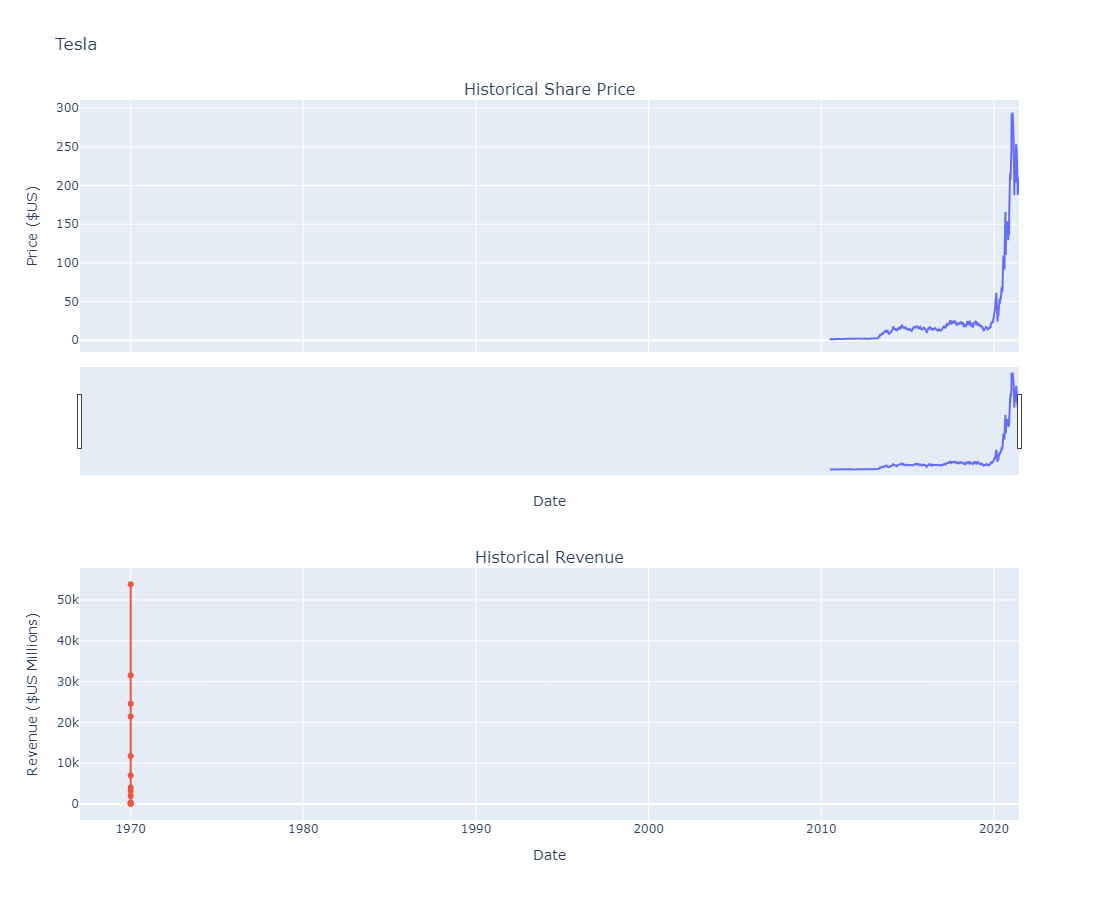

In [17]:
import yfinance as yf
import requests
from bs4 import BeautifulSoup
import pandas as pd
from io import StringIO
import plotly.graph_objects as go
from plotly.subplots import make_subplots


def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

# Extract Tesla stock data
tesla_ticker = 'TSLA'

# Get historical market data
tesla_data = tesla.history(period="max")
# tesla_data = yf.download(tesla_ticker, start='2010-01-01', end='2022-01-01')


tesla_data.reset_index(inplace=True)  # Ensure 'Date' is a column, not an index

# Convert 'Date' column to datetime
tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])

# Download the webpage containing Tesla revenue data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)
html_data = response.content

# Parse the HTML data using BeautifulSoup with lxml parser
soup = BeautifulSoup(html_data, 'lxml')  # Use lxml parser

# Locate the table containing Tesla Revenue data
tables = soup.find_all('table')
# Assuming the Tesla Revenue table is the first table found
tesla_revenue_table = tables[0]

# Convert the table to a DataFrame
html_str = str(tesla_revenue_table)
tesla_revenue = pd.read_html(StringIO(html_str))[0]

# Rename the columns to 'Date' and 'Revenue'
tesla_revenue.columns = ['Date', 'Revenue']

# Convert 'Date' column to datetime
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])

# Clean the Revenue column (remove commas and dollar signs)
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Display the data types of the columns to verify
print(tesla_data.dtypes)
print(tesla_revenue.dtypes)

# Use the make_graph function to plot the data
make_graph(tesla_data, tesla_revenue, 'Tesla')